In [32]:
import pandas as pd

In [33]:
file_path = r"../data/raw/fake_or_real_news.csv" 
columns_to_use = ['title', 'text', 'label']
data = pd.read_csv(file_path, usecols=columns_to_use)

In [34]:
data.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


In [36]:
data['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [37]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

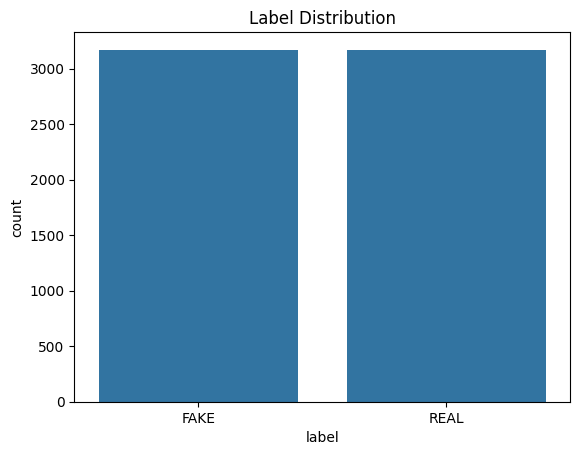

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=data)
plt.title('Label Distribution')
plt.show()

In [39]:
data['text_length'] = data['text'].apply(len)
print(data['text_length'].describe())

count      6335.000000
mean       4707.250355
std        5090.956446
min           1.000000
25%        1741.500000
50%        3642.000000
75%        6192.000000
max      115372.000000
Name: text_length, dtype: float64


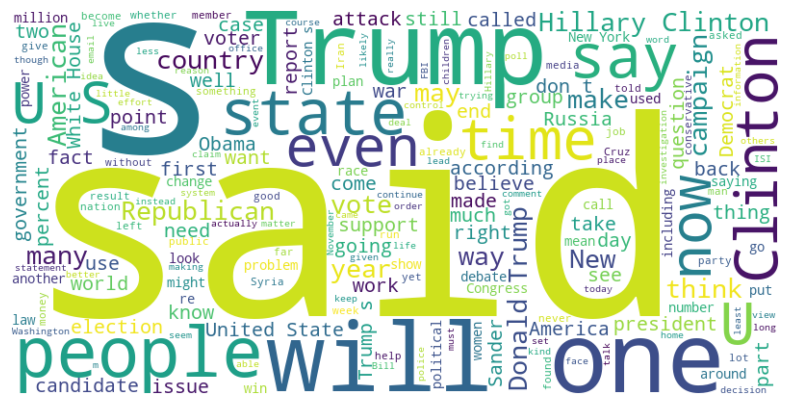

In [40]:
from wordcloud import WordCloud

# Combine all text and create word cloud
all_text = ' '.join(data['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
# Word frequency analysis
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english')) 

# Combine all text
all_text = ' '.join(data['text'])

# Tokenize text
tokens = word_tokenize(all_text.lower())

# Filter stopwords and punctuation
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_tokens)

print(word_counts.most_common(20))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\İbrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\İbrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('trump', 21905), ('said', 21162), ('clinton', 17243), ('would', 12928), ('people', 11598), ('one', 11296), ('new', 9263), ('state', 8741), ('president', 8507), ('also', 8213), ('obama', 8124), ('campaign', 7642), ('us', 7509), ('hillary', 7127), ('like', 7038), ('could', 6706), ('time', 6433), ('even', 6424), ('states', 6141), ('many', 5847)]


In [42]:
# Separate Fake and Real texts
fake_text = ' '.join(data[data['label'] == 'FAKE']['text'])
real_text = ' '.join(data[data['label'] == 'REAL']['text'])

# Tokenize and filtering function
def process_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return Counter(filtered_tokens)

# Calculate word frequencies for Fake and Real texts
fake_word_counts = process_text(fake_text)
real_word_counts = process_text(real_text)

print("Most Common Words in Fake News:")
print(fake_word_counts.most_common(20))

print("\nMost Common Words in Real News:")
print(real_word_counts.most_common(20))

Most Common Words in Fake News:
[('clinton', 6708), ('trump', 6516), ('people', 5355), ('one', 4945), ('us', 4911), ('would', 4908), ('hillary', 4531), ('said', 3988), ('new', 3496), ('like', 3215), ('also', 3185), ('world', 3081), ('election', 2956), ('even', 2895), ('time', 2818), ('state', 2768), ('government', 2691), ('many', 2582), ('could', 2523), ('president', 2519)]

Most Common Words in Real News:
[('said', 17174), ('trump', 15389), ('clinton', 10535), ('would', 8020), ('one', 6351), ('people', 6243), ('president', 5988), ('state', 5973), ('obama', 5913), ('new', 5767), ('campaign', 5525), ('also', 5028), ('republican', 4869), ('party', 4192), ('could', 4183), ('states', 3875), ('like', 3823), ('sanders', 3788), ('time', 3615), ('even', 3529)]
